In [1]:
import pynucastro as pyna

In [2]:
reaclib_lib = pyna.ReacLibLibrary()

In [16]:
original_nuclei = ["p",
                   "he4", "c12", "o16", "ne20", "mg24", "si28", "s32",
                   "ar36", "ca40", "ti44", "cr48", "fe52", "ni56",
                   "al27", "p31", "cl35", "k39", "sc43", "v47", "mn51", "co55",
                   "c14", "n13", "n14", "o18", "f18", "ne21", "na23"]

In [17]:
subch_orig = reaclib_lib.linking_nuclei(original_nuclei)

In [18]:
rc_orig = pyna.RateCollection(libraries=[subch_orig])
rc_orig.plot(rotated=True, hide_xalpha=True, size=(1500, 450), node_size=500, node_font_size=11)

In [20]:
print(subch_orig)

he4 + he4 + he4 --> c12        [Q =   7.28 MeV] (he4 + he4 + he4 --> c12 <fy05_reaclib__>)
c12 + p --> n13                [Q =   1.94 MeV] (c12 + p --> n13 <ls09_reaclib__>)
c12 + he4 --> o16              [Q =   7.16 MeV] (c12 + he4 --> o16 <nac2_reaclib__>)
c12 + c12 --> he4 + ne20       [Q =   4.62 MeV] (c12 + c12 --> he4 + ne20 <cf88_reaclib__>)
c12 + c12 --> p + na23         [Q =   2.24 MeV] (c12 + c12 --> p + na23 <cf88_reaclib__>)
c14 + he4 --> o18              [Q =   6.23 MeV] (c14 + he4 --> o18 <il10_reaclib__>)
c14 --> n14                    [Q =   0.16 MeV] (c14 --> n14 <wc12_reaclib_weak_>)
n13 + he4 --> p + o16          [Q =   5.22 MeV] (n13 + he4 --> p + o16 <cf88_reaclib__>)
n14 + he4 --> f18              [Q =   4.41 MeV] (n14 + he4 --> f18 <il10_reaclib__>)
o16 + he4 --> ne20             [Q =   4.73 MeV] (o16 + he4 --> ne20 <co10_reaclib__>)
o16 + c12 --> he4 + mg24       [Q =   6.77 MeV] (o16 + c12 --> he4 + mg24 <cf88_reaclib__>)
o16 + c12 --> p + al27         [Q =   5

In [25]:
other_rates = [(("o16", "o16"), ("s31", "n")),
               (("s31", "n"), ("s32")),
               (("c12", "o16"), ("si27", "n")),
               (("si27", "n"), ("si28"))]

In [26]:
for r, p in other_rates:
    if not isinstance(p, tuple):
        p = p,
    rfilter = pyna.rates.RateFilter(reactants=r, products=p)
    _library = reaclib_lib.filter(rfilter)
    print(_library)
    subch_orig += _library

o16 + o16 --> n + s31          [Q =   1.50 MeV] (o16 + o16 --> n + s31 <cf88_reaclib__>)
s31 + n --> s32                [Q =  15.04 MeV] (s31 + n --> s32 <ths8_reaclib__>)
o16 + c12 --> n + si27         [Q =  -0.42 MeV] (o16 + c12 --> n + si27 <cf88_reaclib__reverse>)
si27 + n --> si28              [Q =  17.18 MeV] (si27 + n --> si28 <ths8_reaclib__>)


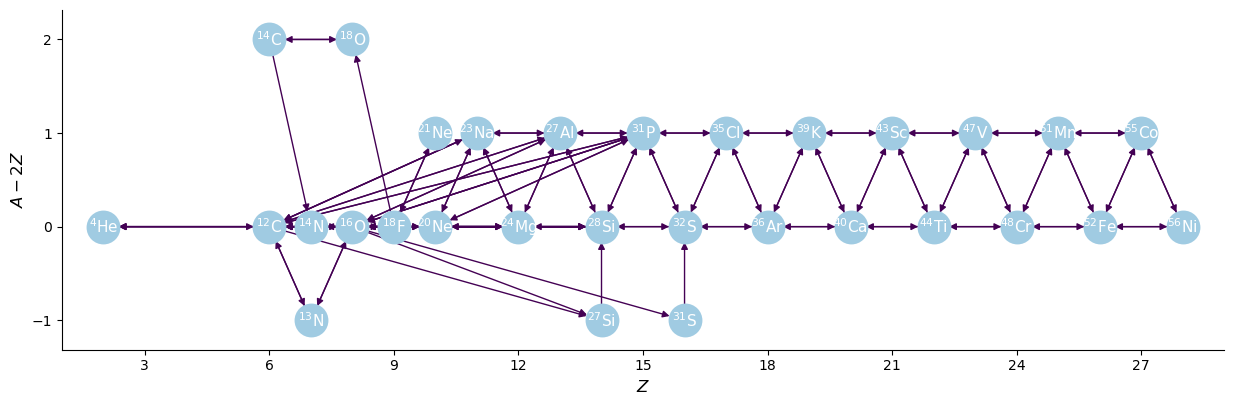

In [27]:
rc_orig = pyna.RateCollection(libraries=[subch_orig])
rc_orig.plot(rotated=True, hide_xalpha=True, size=(1500, 450), node_size=500, node_font_size=11)